背景图片总数：1496
./fonts/迷你简娃娃篆.ttf
垂盒庐歼


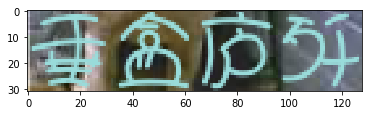

In [406]:
#-*- coding:utf-8 -*-

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import glob
import os
import random
import matplotlib.pyplot as plt


def imgAddText(img, text_content, text_font, text_color=None, text_size=None):
    # 随机生成不大于图片的文字大小
    if text_size == None:
        text_size = random.randint(32, int(float(img.size[0])/len(text_content)-1))
    #设置所使用的字体 和 大小
    font = ImageFont.truetype(text_font, text_size)

    #画图
    draw = ImageDraw.Draw(img)
    text_width, text_height = draw.textsize(text_content, font=font)
    if img.size[0]-text_width < 1 or img.size[1]-text_height < 1:
        print(u'[ERROR]:字号过大')
        return -1
    rand_x = random.randint(0, img.size[0]-text_width-1)  # width
    rand_y = random.randint(0, img.size[1]-text_height-1)  # height

    # 对截取区域求最大颜色
    if text_color == None:
        crop = img.crop((rand_x, rand_y, rand_x + text_width, rand_y + text_height))
        r_max = crop.histogram()[0:256].index(max(crop.histogram()[0:256]))
        g_max = crop.histogram()[256:256*2].index(max(crop.histogram()[256:256*2]))
        b_max = crop.histogram()[256*2:256*3].index(max(crop.histogram()[256*2:256*3]))
        text_color = (255-r_max, 255-g_max, 255-b_max)
    draw.text((rand_x, rand_y), text_content, text_color, font=font)    #设置文字位置/内容/颜色/字体
    # 画框
    # draw.rectangle((rand_x, rand_y, rand_x+text_width, rand_y+text_height))
    draw = ImageDraw.Draw(img)                          #Just draw it!
    
    bbox = (rand_x, rand_y, rand_x + text_width, rand_y + text_height)

    return img, crop, bbox


def randomFont(font_dir_path):
    font_list = glob.glob(os.path.join(font_dir_path, '*.TTF'))
    font_list += glob.glob(os.path.join(font_dir_path, '*.ttf'))
    ran_font = random.randint(0, len(font_list)-1)
    return font_list[ran_font]
    
    
def randomTextContent(chas_id_file_path, len_touple):
    rand_num = random.randint(len_touple[0], len_touple[1])
    index_list = []
    chas_str = ''
    with open(chas_id_file_path) as cha_file:
        cha_line = cha_file.read().decode('utf-8').splitlines()
        for i in range(rand_num):
            rand_index = random.randint(0, len(cha_line)-1)
            index_list.append(cha_line[rand_index].split(' ')[0])
            chas_str += cha_line[rand_index].split(' ')[1]
    return index_list, chas_str
            
    
def makeDataset(bg_dir_path, chas_id_file_path, chas_len_touple, text_font_dir_path, save_path, out_number, is_debug=False):
    img_list = glob.glob(os.path.join(bg_dir_path, '*/*.jpg'))
    if is_debug:
        print(u'背景图片总数：%d'%len(img_list))
    text_font = randomFont(text_font_dir_path)
    while text_font == './fonts/全真行书.ttf':  # 该字体无法正常显示
        text_font = randomFont('./fonts/')    
    if is_debug:
        print(text_font)
    i = 0
    while i < out_number:
        img_path = img_list[random.randint(0, len(img_list)-1)]
        img = Image.open(img_path)
        index_list, chas_str = randomTextContent(chas_id_file_path, chas_len_touple)
        print(chas_str)
        try:
            img, crop, bbox = imgAddText(img=img, text_content=chas_str, text_font=text_font)
            img = img.crop(bbox)
        except Exception,e:
            print e.message
        else:
            img.save(os.path.join(save_path, os.path.basename(img_path)))
            if is_debug:
                plt.imshow(img)
                plt.show()
            else:
                sys.stdout.write('\r>> saved %d / %d'%(i+1, out_unmber))
        
        i += 1
        
        
def main():
    bg_dir_path = './background/'
    chas_id_file_path = './cha_id.txt'
    chas_len_touple = (3,4)
    text_font_dir_path = './fonts/'
    save_path = './'
    out_number = 1
    makeDataset(bg_dir_path, chas_id_file_path, chas_len_touple, text_font_dir_path, save_path, out_number=out_number, is_debug=True)
    
    
if __name__ == '__main__':
    main()
    